In [3]:
import pandas as pd

df = pd.read_csv('train_PTIT.csv')
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Genetic_Algorithms
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Theory
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


In [4]:
df.isna().sum()

w_0        0
w_1        0
w_2        0
w_3        0
w_4        0
          ..
w_1429     0
w_1430     0
w_1431     0
w_1432     0
subject    0
Length: 1434, dtype: int64

<AxesSubplot:>

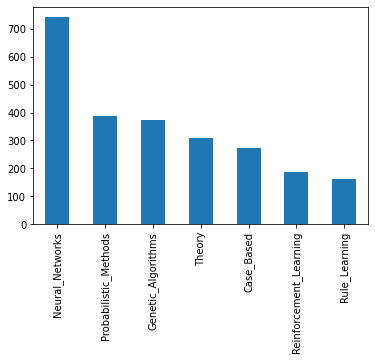

In [3]:
df["subject"].value_counts().plot(kind="bar")

In [8]:
subject = df['subject'].unique()
cnt = 0
for i in subject:
    df['subject'].replace(i, cnt, inplace=True)
    cnt += 1
df['subject'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)

print("LR f1 score", f1_score(y_test, predictions, average="macro"))

0.764344262295082
[[ 60  15   0   1   1   4   3]
 [  6 118   4   2   2   1   3]
 [  1   8  65   1   1   1   0]
 [  1   0   1  14   0   3   4]
 [  2   8   1   0  25   1   2]
 [  1   6   1   2   1  40   4]
 [  1  14   2   1   0   5  51]]
LR f1 score 0.7450866733524087


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

SVM accuracy:  0.7295081967213115
SVM f1 score:  0.7303842086378249
SVM confusion matrix: 
[[ 62  11   0   3   1   3   4]
 [  9 107   3   4   3   2   8]
 [  2   7  64   1   1   1   1]
 [  1   1   1  14   0   3   3]
 [  1   8   1   0  28   0   1]
 [  2   5   3   4   2  37   2]
 [  1  13   1   4   4   7  44]]


In [16]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.310 total time=   3.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.310 total time=   3.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.310 total time=   2.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.310 total time=   3.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.311 total time=   2.9s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   1.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.738 total time=   2.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   1.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.713 total time=   1.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=   1.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.605 total time=   2.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [17]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
# print accuracy score
print("SVM accuracy: ", accuracy_score(y_test, grid.predict(X_test)))
print("SVM f1 score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, grid.predict(X_test)))

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')
SVM accuracy:  0.7704918032786885
SVM f1 score:  0.7697057662621557
SVM confusion matrix: 
[[ 65  12   0   2   1   3   1]
 [  6 123   2   1   0   2   2]
 [  2  11  62   0   1   1   0]
 [  1   1   1  14   0   3   3]
 [  1   8   2   0  27   0   1]
 [  0   9   1   2   2  36   5]
 [  3  18   0   1   2   1  49]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

# create classifier
clf = RandomForestClassifier(n_estimators=150)

# train model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# evaluate
print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

RF accuracy:  0.764344262295082
RF f1 score:  0.763068260909549
RF confusion matrix: 
[[ 60  20   0   0   1   2   1]
 [  6 124   4   0   0   0   2]
 [  2  11  64   0   0   0   0]
 [  1   1   1  14   0   3   3]
 [  1   9   2   0  23   0   4]
 [  0  12   2   2   1  35   3]
 [  2  13   1   0   1   4  53]]


In [23]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_split': min_samples_split}

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

c:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 18 is smaller than n_iter=150. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 18 candidates, totalling 54 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=150),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [24]:
# print best parameter after tuning
print(rf_random.best_params_)
# print how our model looks after hyper-parameter tuning
print(rf_random.best_estimator_)
# print accuracy score
print("RF accuracy: ", accuracy_score(y_test, rf_random.predict(X_test)))
print("RF f1 score: ", f1_score(y_test, rf_random.predict(X_test), average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, rf_random.predict(X_test)))

{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'auto'}
RandomForestClassifier(n_estimators=200)
RF accuracy:  0.764344262295082
RF f1 score:  0.762310609589794
RF confusion matrix: 
[[ 62  17   0   1   1   2   1]
 [  6 122   6   0   0   1   1]
 [  1  10  66   0   0   0   0]
 [  0   1   1  14   0   2   5]
 [  2   8   2   0  24   1   2]
 [  0  10   1   2   2  36   4]
 [  4  14   2   0   1   4  49]]
